<a href="https://colab.research.google.com/github/briannalizbinoy/My-Projects/blob/main/4_Astrometry_Finding_Velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install astropy
!pip install photutils
!pip install matplotlib astropy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
from astropy.coordinates import SkyCoord
import astropy.units as u
from pathlib import Path
from astropy.io import fits
from astropy.stats import sigma_clip
import astropy.units as u
from astropy.coordinates import SkyCoord
from photutils.detection import DAOStarFinder
import zipfile
import os
from glob import glob
from scipy.optimize import curve_fit
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
plates_1 = np.array([[-190833.55902242, 3587.43183624, 1015.13348155],
                     [3449.05766971, 190976.50356884, 1042.63742992]])

plates_2 = np.array([[-191787.87568368, 3284.60318849, 1014.46952208],
                     [3017.64964738, 191504.34382733, 1042.1546029]])

plates_3 = np.array([[-191870.21546091, 3394.72916352, 1015.04458741],
                     [3321.39673498, 191600.91246643, 1042.5020863]])

plates_4 = np.array([[-191738.41841866, 3309.87661568, 1015.57662374],
                     [3548.63018819, 191797.56956724, 1042.98139081]])

# Calculate the mean
plates_mean = np.mean([plates_1, plates_2, plates_3, plates_4], axis=0)

# Print the mean
print("plates_mean:")
print(plates_mean)

plates_mean:
[[-191557.51714642    3394.16020098    1015.05605369]
 [   3334.18356007  191469.83235746    1042.56887748]]


In [ ]:
# Given list of coordinates
ephemeris = [("05 24 06.75", "26 58 48.3"),
              ("05 23 33.06", "26 58 03.9"),
              ("05 22 30.16", "26 56 32.4"),
              ("05 21 14.29", "26 54 24.8")]

# Convert each coordinate to degrees
for ra_string, dec_string in ephemeris:
    coordinates = SkyCoord(ra_string, dec_string, unit=(u.hourangle, u.deg))
    ra = coordinates.ra.deg
    dec = coordinates.dec.deg

    # Print the results
    print(f"RA: {ra:.6f} degrees, Dec: {dec:.6f} degrees")

center_coord = SkyCoord("81.031375 deg", "26.980694444444442 deg")
print(f"center_coord: RA = {center_coord.ra.deg:.6f} degrees, Dec = {center_coord.dec.deg:.6f} degrees")


RA: 81.028125 degrees, Dec: 26.980083 degrees
RA: 80.887750 degrees, Dec: 26.967750 degrees
RA: 80.625667 degrees, Dec: 26.942333 degrees
RA: 80.309542 degrees, Dec: 26.906889 degrees
center_coord: RA = 81.031375 degrees, Dec = 26.980694 degrees


In [ ]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

def get_XY(ra, dec, alpha0, delta0):
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    alpha0_rad = np.radians(alpha0)
    delta0_rad = np.radians(delta0)
    print(alpha0, delta0)
    print(alpha0_rad, delta0_rad)

    X = -(np.cos(dec_rad) * np.sin(ra_rad - alpha0_rad)) / (
            (np.cos(delta0_rad) * np.cos(dec_rad) * np.cos(ra_rad - alpha0_rad)) + np.sin(delta0_rad) * np.sin(dec_rad))

    Y = -((np.sin(delta0_rad) * np.cos(dec_rad) * np.cos(ra_rad - alpha0_rad)) - np.cos(delta0_rad) * np.sin(dec_rad)) / (
            (np.cos(delta0_rad) * np.cos(dec_rad) * np.cos(ra_rad - alpha0_rad)) + np.sin(delta0_rad) * np.sin(dec_rad))
    return X,Y



# Given center coordinates
alpha0, delta0 = 81.031375, 26.980694444444442

# Given list of coordinates
ephemeris = [("05 24 06.75", "26 58 48.3"),
              ("05 23 33.06", "26 58 03.9"),
              ("05 22 30.16", "26 56 32.4"),
              ("05 21 14.29", "26 54 24.8")]

# Convert each coordinate to (X, Y) using the get_XY function
for ra_string, dec_string in ephemeris:
    coordinates = SkyCoord(ra_string, dec_string, unit=(u.hourangle, u.deg))
    ra, dec = coordinates.ra.deg, coordinates.dec.deg

    X, Y = get_XY(ra, dec, alpha0, delta0)

    # Print the results
    print(f"For RA={ra:.6f} deg, Dec={dec:.6f} deg:")
    print(f"X = {X:.6f}, Y = {Y:.6f}")
    print()


81.031375 26.980694444444442
1.4142642911682202 0.4709019525300978
For RA=81.028125 deg, Dec=26.980083 deg:
X = 0.000051, Y = -0.000011

81.031375 26.980694444444442
1.4142642911682202 0.4709019525300978
For RA=80.887750 deg, Dec=26.967750 deg:
X = 0.002234, Y = -0.000225

81.031375 26.980694444444442
1.4142642911682202 0.4709019525300978
For RA=80.625667 deg, Dec=26.942333 deg:
X = 0.006312, Y = -0.000659

81.031375 26.980694444444442
1.4142642911682202 0.4709019525300978
For RA=80.309542 deg, Dec=26.906889 deg:
X = 0.011235, Y = -0.001256



In [ ]:
# Given plates_mean constants
a_11, a_12, x_0 = plates_mean[0]
a_21, a_22, y_0 = plates_mean[1]
print(plates_mean[0])
print(plates_mean[1])
# Convert each (X, Y) coordinate to (x, y) using the given formula
for ra_string, dec_string in ephemeris:
    coordinates = SkyCoord(ra_string, dec_string, unit=(u.hourangle, u.deg))
    ra, dec = coordinates.ra.deg, coordinates.dec.deg

    X, Y = get_XY(ra, dec, alpha0, delta0)

    # Convert to (x, y)
    x = a_11 * X + a_12 * Y + x_0
    y = a_21 * X + a_22 * Y + y_0

    # Print the results
    print(f"For RA={ra:.6f} deg, Dec={dec:.6f} deg:")
    print(f"x = {x:.6f}, y = {y:.6f}")
    print()


[-191557.51714642    3394.16020098    1015.05605369]
[  3334.18356007 191469.83235746   1042.56887748]
81.031375 26.980694444444442
1.4142642911682202 0.4709019525300978
For RA=81.028125 deg, Dec=26.980083 deg:
x = 1005.336681, y = 1040.695346

81.031375 26.980694444444442
1.4142642911682202 0.4709019525300978
For RA=80.887750 deg, Dec=26.967750 deg:
x = 586.324261, y = 1007.003630

81.031375 26.980694444444442
1.4142642911682202 0.4709019525300978
For RA=80.625667 deg, Dec=26.942333 deg:
x = -196.384283, y = 937.360338

81.031375 26.980694444444442
1.4142642911682202 0.4709019525300978
For RA=80.309542 deg, Dec=26.906889 deg:
x = -1141.342535, y = 839.518453



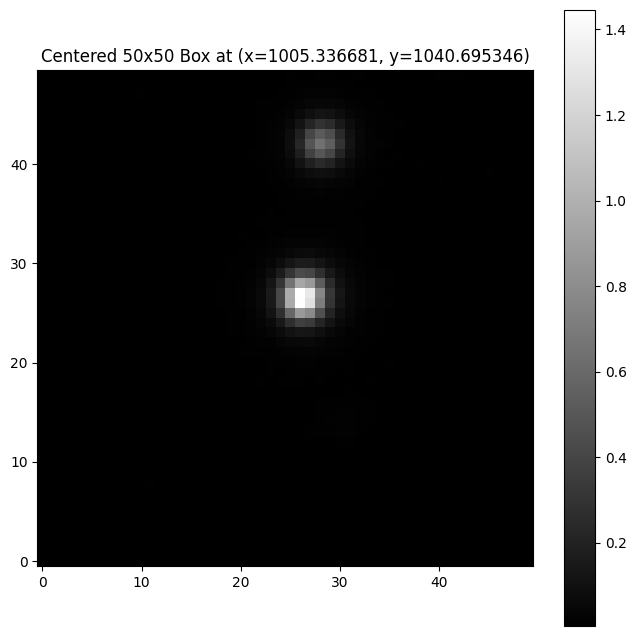

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Open the FITS file and extract the data
fits_path = '/content/drive/MyDrive/26Proserpina/Cleaned/cleaned_20120119_0.fits'
img_data = fits.open(fits_path)[0].data

# Center coordinates for the 50x50 box
center_x, center_y = 1005.336681, 1040.695346
box_size = 50

# Define the region of interest
xmin, xmax = int(center_x - box_size/2), int(center_x + box_size/2)
ymin, ymax = int(center_y - box_size/2), int(center_y + box_size/2)

# Extract the region of interest from the image
roi_data = img_data[ymin:ymax, xmin:xmax]

# Plot the image with the centered box
plt.figure(figsize=(8, 8))
img = plt.imshow(roi_data, cmap='gray', origin='lower')
plt.title(f'Centered 50x50 Box at (x={center_x:.6f}, y={center_y:.6f})')
plt.colorbar(img)  # Pass the image object to the colorbar function
plt.show()


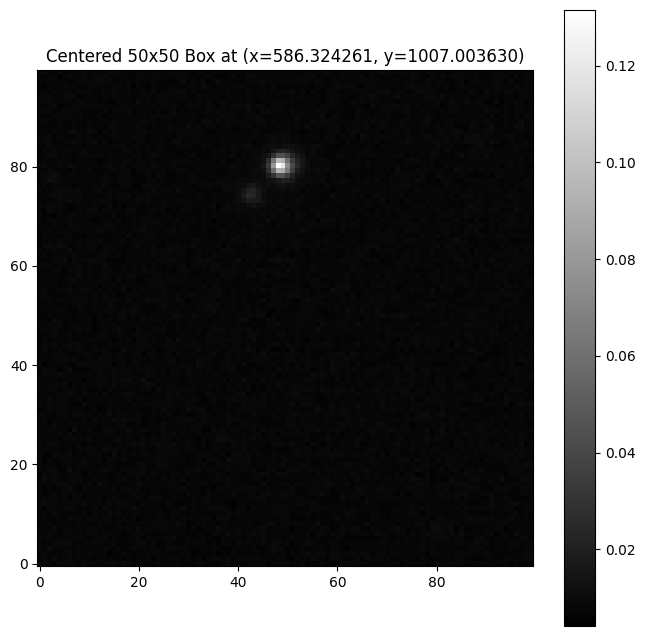

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Open the FITS file and extract the data
fits_path = '/content/drive/MyDrive/26Proserpina/Cleaned/cleaned_20120120_0.fits'
img_data = fits.open(fits_path)[0].data

# Center coordinates for the 50x50 box
center_x, center_y = 586.324261, 1007.003630
box_size = 100

# Define the region of interest
xmin, xmax = int(center_x - box_size/2), int(center_x + box_size/2)
ymin, ymax = int(center_y - box_size/2), int(center_y + box_size/2)

# Extract the region of interest from the image
roi_data = img_data[ymin:ymax, xmin:xmax]

# Plot the image with the centered box
plt.figure(figsize=(8, 8))
img = plt.imshow(roi_data, cmap='gray', origin='lower')
plt.title(f'Centered 50x50 Box at (x={center_x:.6f}, y={center_y:.6f})')
plt.colorbar(img)  # Pass the image object to the colorbar function
plt.show()


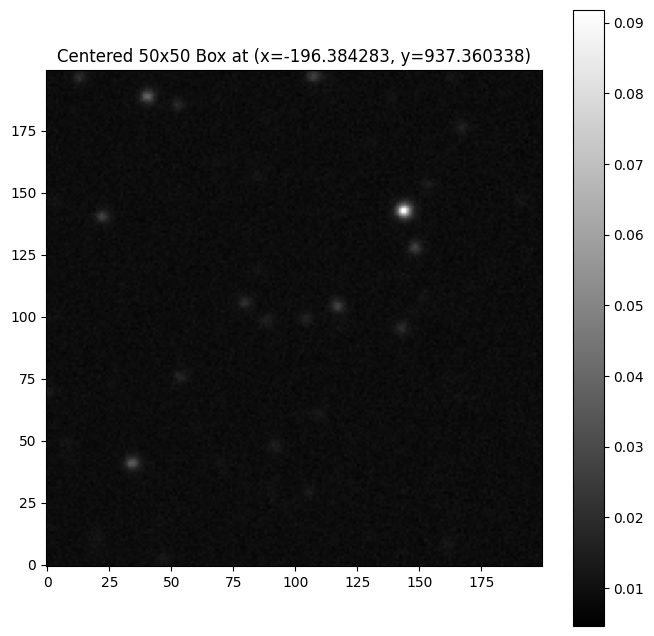

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Open the FITS file and extract the data
fits_path = '/content/drive/MyDrive/26Proserpina/Cleaned/cleaned_20120122_0.fits'
img_data = fits.open(fits_path)[0].data

# Center coordinates for the 50x50 box
center_x, center_y = -196.384283,  937.360338
box_size = 200

# Define the region of interest
xmin, xmax = int(center_x - box_size/2), int(center_x + box_size/2)
ymin, ymax = int(center_y - box_size/2), int(center_y + box_size/2)

# Extract the region of interest from the image
roi_data = img_data[ymin:ymax, xmin:xmax]

# Plot the image with the centered box
plt.figure(figsize=(8, 8))
img = plt.imshow(roi_data, cmap='gray', origin='lower')
plt.title(f'Centered 50x50 Box at (x={center_x:.6f}, y={center_y:.6f})')
plt.colorbar(img)  # Pass the image object to the colorbar function
plt.show()


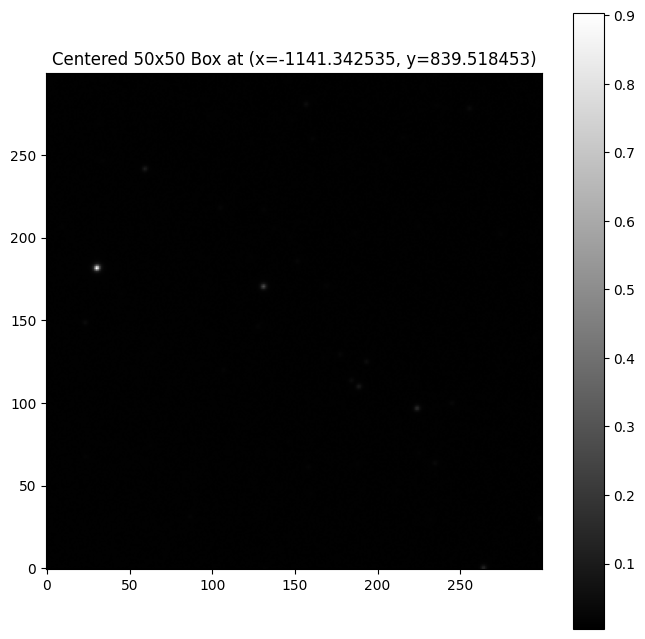

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Open the FITS file and extract the data
fits_path = '/content/drive/MyDrive/26Proserpina/Cleaned/cleaned_20120125_0.fits'
img_data = fits.open(fits_path)[0].data

# Center coordinates for the 50x50 box
center_x, center_y =  -1141.342535,  839.518453
box_size = 300

# Define the region of interest
xmin, xmax = int(center_x - box_size/2), int(center_x + box_size/2)
ymin, ymax = int(center_y - box_size/2), int(center_y + box_size/2)

# Extract the region of interest from the image
roi_data = img_data[ymin:ymax, xmin:xmax]

# Plot the image with the centered box
plt.figure(figsize=(8, 8))
img = plt.imshow(roi_data, cmap='gray', origin='lower')
plt.title(f'Centered 50x50 Box at (x={center_x:.6f}, y={center_y:.6f})')
plt.colorbar(img)  # Pass the image object to the colorbar function
plt.show()


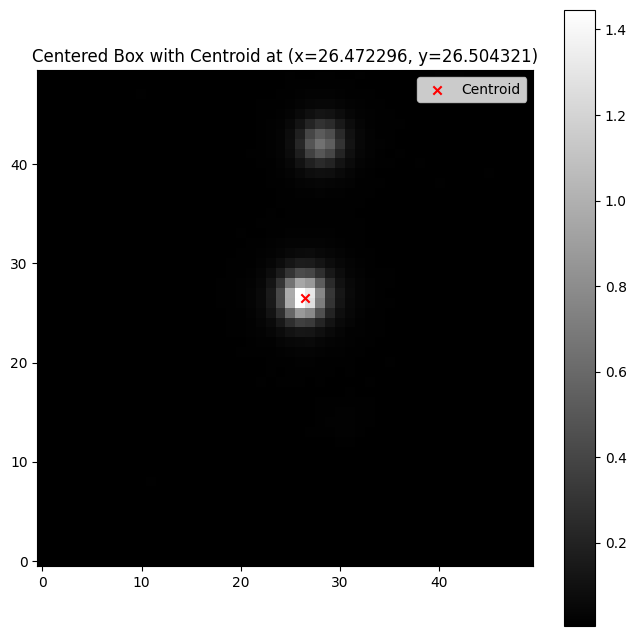

26.47229645176488 26.50432089766591


KeyboardInterrupt: 

<Figure size 800x800 with 0 Axes>

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import imshow_norm, ZScaleInterval

def find_centroid(image, threshold):
    # Mask pixels below the threshold
    masked_image = np.where(image > threshold, image, 0)

    # Use the coordinates of the maximum pixel value as the initial guess
    max_coord = np.unravel_index(np.argmax(masked_image), masked_image.shape)

    # Create a grid of coordinates around the initial guess
    x, y = np.meshgrid(np.arange(masked_image.shape[1]), np.arange(masked_image.shape[0]))

    # Calculate the centroid using a weighted average
    x_centroid = np.sum(x * masked_image) / np.sum(masked_image)
    y_centroid = np.sum(y * masked_image) / np.sum(masked_image)

    return x_centroid, y_centroid

def plot_box_with_centroid(img_data, center_x, center_y, box_size, threshold):
    # Define the region of interest
    xmin, xmax = int(center_x - box_size/2), int(center_x + box_size/2)
    ymin, ymax = int(center_y - box_size/2), int(center_y + box_size/2)

    # Extract the region of interest from the image
    roi_data = img_data[ymin:ymax, xmin:xmax]

    # Find the centroid
    x_centroid, y_centroid = find_centroid(roi_data, threshold)

    # Plot the image with the centered box and centroid
    plt.figure(figsize=(8, 8))
    plt.imshow(roi_data, cmap='gray', origin='lower')
    plt.title(f'Centered Box with Centroid at (x={x_centroid:.6f}, y={y_centroid:.6f})')
    plt.colorbar()
    plt.scatter(x_centroid, y_centroid, color='red', marker='x', label='Centroid')
    plt.legend()
    plt.show()
    print(x_centroid, y_centroid)
# Example usage for each box
fits_paths = [
    '/content/drive/MyDrive/26Proserpina/Cleaned/cleaned_20120119_0.fits',
    '/content/drive/MyDrive/26Proserpina/Cleaned/cleaned_20120120_0.fits',
    '/content/drive/MyDrive/26Proserpina/Cleaned/cleaned_20120122_0.fits',
    '/content/drive/MyDrive/26Proserpina/Cleaned/cleaned_20120125_0.fits',
]

center_coordinates = [
    (1005.336681, 1040.695346),
    (586.324261, 1007.003630),
    (-196.384283,  937.360338),
    (-1141.342535,  839.518453),
]

box_sizes = [50, 100, 200, 300]

# Threshold values for each image
thresholds = [1, 0.12, 0.08, 0.8]

for fits_path, center_coord, box_size, threshold in zip(fits_paths, center_coordinates, box_sizes, thresholds):
    img_data = fits.open(fits_path)[0].data
    center_x, center_y = center_coord
    plot_box_with_centroid(img_data, center_x, center_y, box_size, threshold)



In [ ]:
result1 = ((26.47229645176488, 26.50432089766591)[0] - (25, 25)[0], (26.47229645176488, 26.50432089766591)[1] - (25, 25)[1])
print(result1)

result2 = ((48.0 ,80.0)[0] - (50, 50)[0], (48.0 ,80.0)[1] - (50, 50)[1])
print(result2)

result3 = ((143.4966536154769 ,142.49996834267677)[0] - (100, 100)[0], (143.4966536154769 ,142.49996834267677)[1] - (100, 100)[1])
print(result3)

result4 = ((30.0, 181.0)[0] - (150, 150)[0], (30.0 ,181.0)[1] - (150, 150)[1])
print(result4)


(1.4722964517648798, 1.5043208976659095)
(-2.0, 30.0)
(43.4966536154769, 42.499968342676766)
(-120.0, 31.0)


In [ ]:
center_coordinates = [
    (1005.336681, 1040.695346),
    (586.324261, 1007.003630),
    (-196.384283,  937.360338),
    (-1141.342535,  839.518453),
]

centroid1 = (1005.336681, 1040.695346)
centroid2 = (586.324261, 1007.003630)
centroid3 = (-196.384283, 937.360338)
centroid4 = (-1141.342535, 839.518453)

centroid1 = (centroid1[0] + result1[0], centroid1[1] + result1[1])
centroid2 = (centroid2[0] + result2[0], centroid2[1] + result2[1])
centroid3 = (centroid3[0] + result3[0], centroid3[1] + result3[1])
centroid4 = (centroid4[0] + result4[0], centroid4[1] + result4[1])

print(centroid1)
print(centroid2)
print(centroid3)
print(centroid4)

(1006.8089774517649, 1042.1996668976658)
(584.324261, 1037.0036300000002)
(-152.8876293845231, 979.8603063426767)
(-1261.342535, 870.518453)


In [ ]:
# Function to convert (x, y) to (X, Y) coordinates
def convert_coordinates(x, y):
    X = (a_22 * (x - x_0) - a_12 * (y - y_0)) / (a_11 * a_22 - a_12 * a_21)
    Y = (a_11 * (y - y_0) - a_21 * (x - x_0)) / (a_11 * a_22 - a_12 * a_21)
    return X, Y

# Coordinates for centroid1
centroid1_x, centroid1_y = centroid1
centroid1_X, centroid1_Y = convert_coordinates(centroid1_x, centroid1_y)
print(f"Centroid1 (X, Y): ({centroid1_X}, {centroid1_Y})")

# Coordinates for centroid2
centroid2_x, centroid2_y = centroid2
centroid2_X, centroid2_Y = convert_coordinates(centroid2_x, centroid2_y)
print(f"Centroid2 (X, Y): ({centroid2_X}, {centroid2_Y})")

# Coordinates for centroid3
centroid3_x, centroid3_y = centroid3
centroid3_X, centroid3_Y = convert_coordinates(centroid3_x, centroid3_y)
print(f"Centroid3 (X, Y): ({centroid3_X}, {centroid3_Y})")

# Coordinates for centroid4
centroid4_x, centroid4_y = centroid4
centroid4_X, centroid4_Y = convert_coordinates(centroid4_x, centroid4_y)
print(f"Centroid4 (X, Y): ({centroid4_X}, {centroid4_Y})")

Centroid1 (X, Y): (4.300530517712567e-05, -2.677174571261983e-06)
Centroid2 (X, Y): (0.002247368387500201, -6.820075023167926e-05)
Centroid3 (X, Y): (0.0060894093935758625, -0.00043355017763535873)
Centroid4 (X, Y): (0.011864047349870276, -0.001105173245867865)


In [ ]:


alpha0_rad = 1.4142642911682202  # Replace with actual value in radians
delta0_rad = 0.4709019525300978  # Replace with actual value in radians



In [ ]:
def convert_to_radec(X, Y):
    ra_rad = alpha0_rad + np.arctan2(X, -Y)
    dec_rad = np.arcsin(np.sin(delta0_rad) * np.cos(np.arctan2(X, -Y)) - np.cos(delta0_rad) * np.sin(np.arctan2(X, -Y)))

    return ra_rad, dec_rad

# Function to convert radians to degrees
def radians_to_degrees(radians):
    return np.degrees(radians)

# Convert (X, Y) coordinates to (ra, dec) coordinates in radians
centroid1_ra_rad, centroid1_dec_rad = convert_to_radec(centroid1_X, centroid1_Y)
centroid2_ra_rad, centroid2_dec_rad = convert_to_radec(centroid2_X, centroid2_Y)
centroid3_ra_rad, centroid3_dec_rad = convert_to_radec(centroid3_X, centroid3_Y)
centroid4_ra_rad, centroid4_dec_rad = convert_to_radec(centroid4_X, centroid4_Y)

# Convert radians to degrees
centroid1_ra_deg = radians_to_degrees(centroid1_ra_rad)
centroid1_dec_deg = radians_to_degrees(centroid1_dec_rad)

centroid2_ra_deg = radians_to_degrees(centroid2_ra_rad)
centroid2_dec_deg = radians_to_degrees(centroid2_dec_rad)

centroid3_ra_deg = radians_to_degrees(centroid3_ra_rad)
centroid3_dec_deg = radians_to_degrees(centroid3_dec_rad)

centroid4_ra_deg = radians_to_degrees(centroid4_ra_rad)
centroid4_dec_deg = radians_to_degrees(centroid4_dec_rad)

# Print (ra, dec) coordinates for all four centroids
print(f"Centroid1 (ra, dec): ({centroid1_ra_deg}, {centroid1_dec_deg})")
print(f"Centroid2 (ra, dec): ({centroid2_ra_deg}, {centroid2_dec_deg})")
print(f"Centroid3 (ra, dec): ({centroid3_ra_deg}, {centroid3_dec_deg})")
print(f"Centroid4 (ra, dec): ({centroid4_ra_deg}, {centroid4_dec_deg})")

Centroid1 (ra, dec): (167.46918387414223, -59.45711442969782)
Centroid2 (ra, dec): (169.29315696834442, -61.28108752389998)
Centroid3 (ra, dec): (166.95893577558567, -58.94686633114124)
Centroid4 (ra, dec): (165.70945153239393, -57.69738208794949)


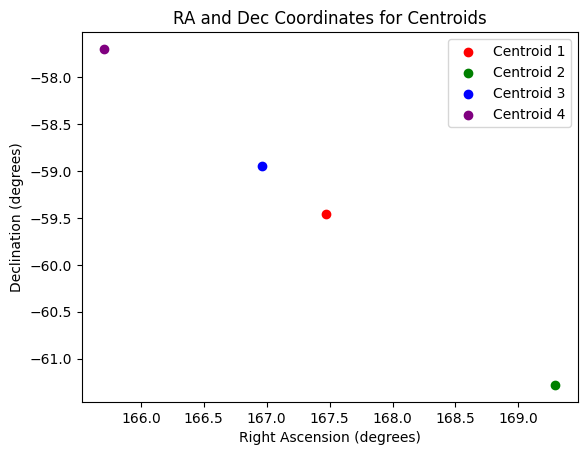

In [ ]:
# Plotting
plt.scatter(centroid1_ra_deg, centroid1_dec_deg, label='Centroid 1', color='red')
plt.scatter(centroid2_ra_deg, centroid2_dec_deg, label='Centroid 2', color='green')
plt.scatter(centroid3_ra_deg, centroid3_dec_deg, label='Centroid 3', color='blue')
plt.scatter(centroid4_ra_deg, centroid4_dec_deg, label='Centroid 4', color='purple')

# Adding labels and title
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('RA and Dec Coordinates for Centroids')

# Adding legend
plt.legend()

# Show the plot
plt.show()

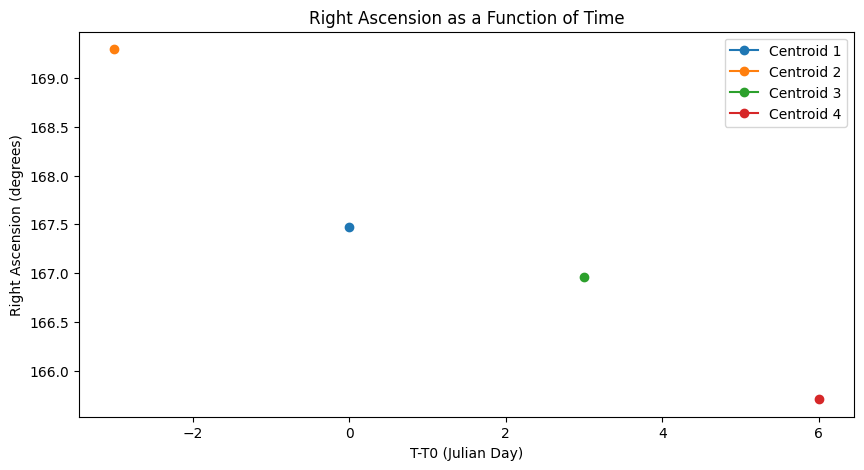

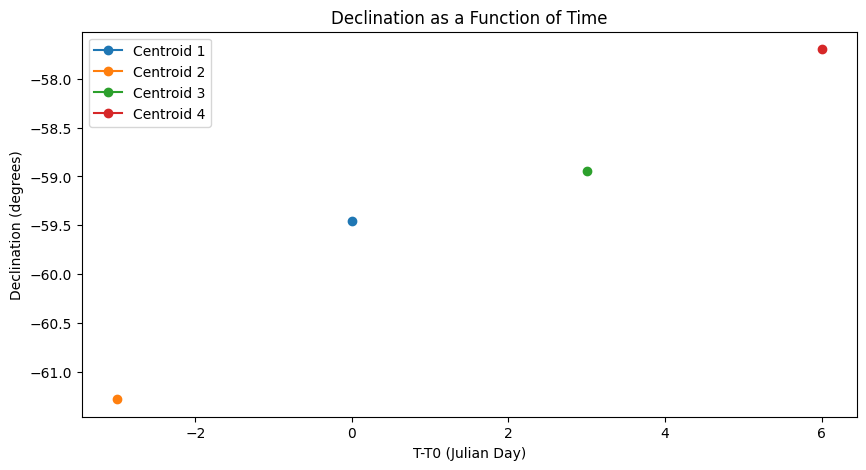

In [ ]:


# Plotting right ascension as a function of time
plt.figure(figsize=(10, 5))
plt.plot(0, centroid1_ra_deg, label='Centroid 1', marker='o', linestyle='-')
plt.plot(-3, centroid2_ra_deg, label='Centroid 2', marker='o', linestyle='-')
plt.plot(3, centroid3_ra_deg, label='Centroid 3', marker='o', linestyle='-')
plt.plot(6, centroid4_ra_deg, label='Centroid 4', marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('T-T0 (Julian Day)')
plt.ylabel('Right Ascension (degrees)')
plt.title('Right Ascension as a Function of Time')

# Adding legend
plt.legend()

# Show the plot
plt.show()

# Plotting declination as a function of time
plt.figure(figsize=(10, 5))
plt.plot(0, centroid1_dec_deg, label='Centroid 1', marker='o', linestyle='-')
plt.plot(-3, centroid2_dec_deg, label='Centroid 2', marker='o', linestyle='-')
plt.plot(3, centroid3_dec_deg, label='Centroid 3', marker='o', linestyle='-')
plt.plot(6, centroid4_dec_deg, label='Centroid 4', marker='o', linestyle='-')
# Adding labels and title
plt.xlabel('T-T0 (Julian Day)')
plt.ylabel('Declination (degrees)')
plt.title('Declination as a Function of Time')

# Adding legend
plt.legend()

# Show the plot
plt.show()